In [45]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from skimage.color import rgb2gray


In [51]:
# Define the directory containing your photos
photos_directory = "F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad/"

# Define the pattern to match image files (you can adjust this pattern if needed)
image_files_pattern = "*.bmp"

# Get a list of file paths matching the pattern
photo_paths = glob.glob(photos_directory + image_files_pattern)
# Display the list of photo paths
print("Photo paths:")
for path in photo_paths:
    print(path)

Photo paths:
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_index_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_little_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_middle_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_ring_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_thumb_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_

In [52]:
# Define a dictionary to map finger names to numbers
finger_mapping = {'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3, 'little': 4}
# Initialize lists to store image data and target labels
image_data = []
target_labels = []
for filename in os.listdir(photos_directory):
    if filename.endswith(".bmp"):
        subject_id, gender, lr, finger, _ = filename.split('_')
        # gender, lr, finger, _ = etc.split('_')
        gender = 0 if gender == 'M' else 1
        lr = 0 if lr =='Left' else 1
        
        if finger == 'thumb':
            finger = 0
        elif finger == 'index':
            finger = 1
        elif finger == 'middle':
            finger = 2
        elif finger == 'ring':
            finger = 3
        elif finger == 'little':
            finger = 4
        target_labels.append([subject_id, gender, lr, finger])
        path = photos_directory + filename
        img = Image.open(path) 
        print(img.size)
        if img.mode != 'RGB':
            # print(img.mode)
            img = img.convert('RGB')
        # resized_photo = img.resize((110, 180))
        # img=img.convert('L')      
        # img_np_array = np.array(img)
        # # gray_image = rgb2gray(img_np_array)
        # img_np_array = np.expand_dims(img_np_array, axis=-1)
        # real_photo = img_np_array.astype(np.float32)/255.
        # resized_photo = img.resize((90, 144))      
        img_np_array = np.array(img)
        gray_image = rgb2gray(img_np_array)
        gray_image = np.expand_dims(gray_image, axis=-1)
        real_photo = gray_image.astype(np.float32)
        # print(real_photo)        
        # print(real_photo.max(),real_photo.min())
        # for row in real_photo:
        #     for pixel in row:
        #         if pixel.any()>0 and pixel.any()<1:
        #             print(str(pixel) + '\n')
                
        # print(img_np_array)
        # break
    
 
        # print(path,real_photo.shape,real_photo.size)
        # plt.figure(figsize=(8, 4))
        # plt.subplot(1, 3, 1)
        # plt.imshow(real_photo.squeeze(),cmap='gray')
        image_data.append(real_photo)

# Convert lists to NumPy arrays
# image_data = np.array(image_data)
target_labels = np.array(target_labels)

(184, 304)
(184, 295)
(184, 313)
(193, 287)
(237, 357)
(149, 287)
(175, 304)
(184, 278)
(175, 339)
(228, 330)


In [55]:
from skimage.transform import resize
image_data = np.array([resize(img, (90, 90), order=3, preserve_range=True) for img in image_data])
image_data = np.pad(image_data, ((0, 0), (27, 27), (0, 0), (0, 0)), mode='constant',constant_values=1)


image_data = np.array(image_data)
# image_data = image_data.astype(np.uint8) # Convert to uint8 (0-255)
# print(image_data[2])


(10, 144, 90, 1)


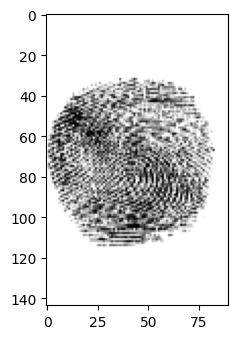

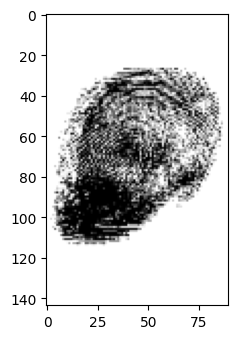

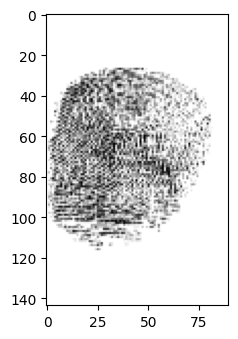

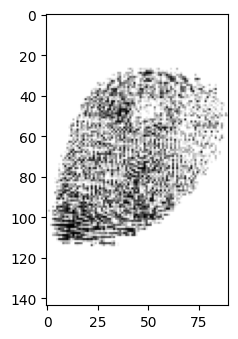

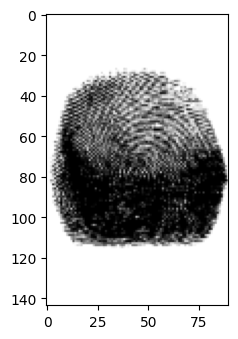

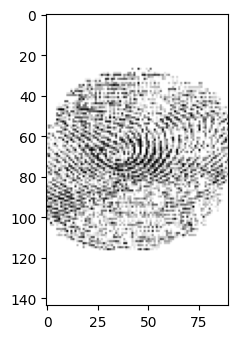

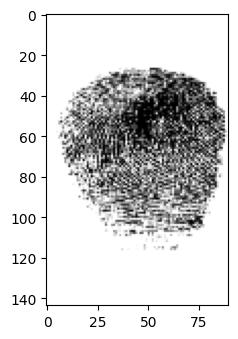

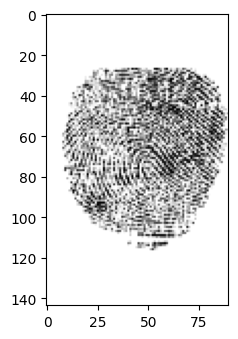

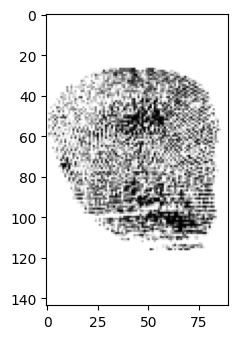

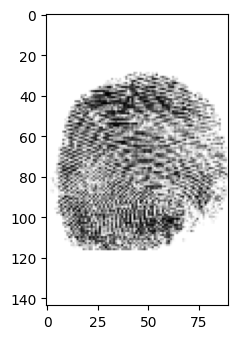

In [56]:
print(image_data.shape)
for i in range(len(image_data)):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    # plt.title(target_labels[i])
    plt.imshow(image_data[i].squeeze(),cmap='gray')

# image_data[0] = image_data[0].astype(np.float32)/255.
# print(image_data[0])
# import numpy as np
x_real = np.load('dataset/x_real.npz')['data']
# x_real[0] = x_real[0].astype(np.float32) / 255.
# print(x_real[0])

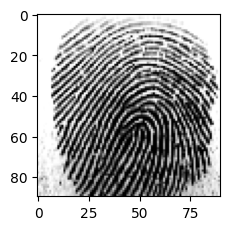

In [36]:
import numpy as np
x_real=np.load('dataset/x_real.npz')['data']
rx=x_real[0]
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
# plt.title(target_labels[i])
plt.imshow(rx.squeeze(),cmap='gray')

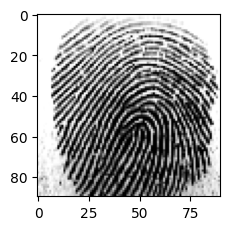

In [107]:
rx1=rx.astype(np.float32)/255.
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
# plt.title(target_labels[i])
plt.imshow(rx1.squeeze(),cmap='gray')

In [84]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad/605_M_Left_thumb_finger.bmp', cv2.IMREAD_GRAYSCALE)

# Convert image to float32
image_float = np.float32(image)

# Normalize to range 0-1
normalized_image = cv2.normalize(image_float, None, 0.0, 1.0, cv2.NORM_MINMAX)

# Scale to 0-255
scaled_image = np.uint8(normalized_image * 1)

# Save or display the image
# cv2.imwrite('output_image.jpg', scaled_image)
# Or
# cv2.imshow('Scaled Image', scaled_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# print(scaled_image)
# plt.figure(figsize=(8, 4))
# plt.subplot(1, 3, 1)
# # plt.title(target_labels[i])
# plt.imshow(scaled_image.squeeze(),cmap='gray')
with open('output.txt', 'w') as f:
    # Iterate through each pixel and write its value to the file
    for row in image_data[4]:
        for pixel in row:
            f.write(str(pixel) + '\n')

# print("Image values written to:", output)

In [57]:
with open('new1.npz', 'wb') as logo_file:
  np.save(logo_file, image_data)

In [58]:
with open('tar1.npy', 'wb') as logo_file:
  np.save(logo_file,target_labels )

In [59]:
X = np.load('foot1.npz')
Y = np.load('trgt1.npy')

(160, 100, 1)
10


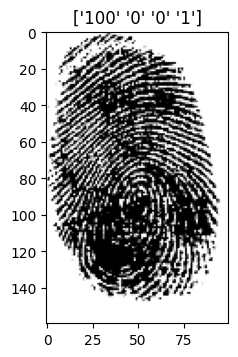

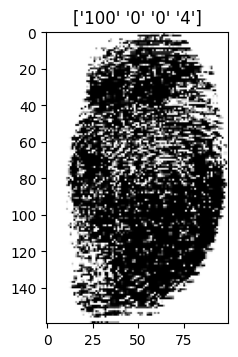

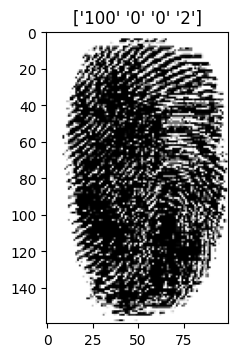

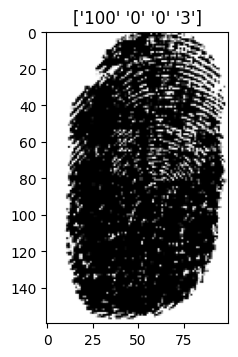

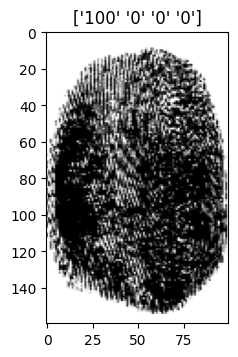

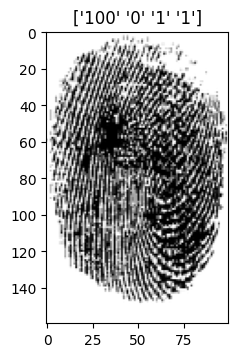

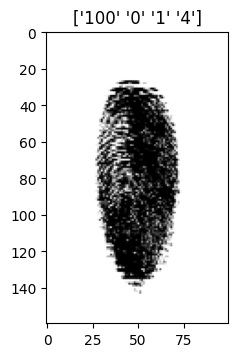

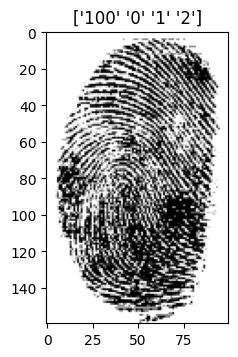

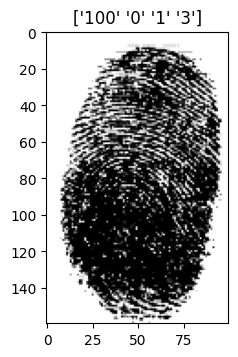

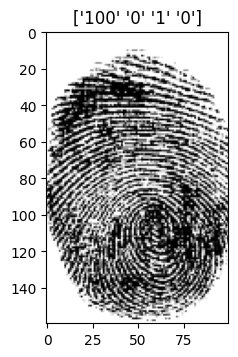

In [26]:
print(X[9].shape)
print(len(X))
for i in range(len(X)):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    plt.title(Y[i])
    plt.imshow(X[i].squeeze(),cmap='gray')